In [1]:
from cobaya.likelihood import Likelihood
from cobaya.model import get_model
import numpy as np
import matplotlib.pyplot as plt

zarr = np.linspace(0, 2, 40)

In [2]:
class DummyLike(Likelihood):
    def initialize(self):
        self.stop_at_error = True

    def get_requirements(self):

        return {
            'power': {},
            'MF': {},
            'Pk_interpolator': {
                "z": zarr,
                "k_max": 5.0,
                "nonlinear": False,
                "vars_pairs": [["delta_tot", "delta_tot"]],
            },
            'Pk_grid': {
                "z": zarr,
                "k_max": 10,
                "nonlinear": False,
                "vars_pairs": [["delta_tot", "delta_tot"]],
            }}

    def logp(self, **params):
        mf = self.theory.get_result('MF')
        pk = self.theory.get_Pk_interpolator(nonlinear=False)
        return mf.dndm.sum()

In [4]:
h = .673
cosmo_params = {
    "omega_b": 0.02233,
    "omega_cdm": 0.1198,
    "h": h,
    "A_s": 2.097e-9,
    "n_s": 0.9652,
    "tau_reio": 0.0540
}

In [5]:
import classy

In [6]:
cosmo = classy.Class()
cosmo.set({"P_k_max_1/Mpc": 10.0, "output": "mPk", **cosmo_params})
cosmo.compute()

In [7]:
info = {
    "debug": False,
    "params": {
        "omegabh2": cosmo_params['omega_b']*h**2,
        "omegach2": cosmo_params['omega_cdm']*h**2,
        "H0": 100*h,
        "tau": cosmo_params['tau_reio'],
        "As": cosmo_params['A_s'],
        "ns": cosmo_params['n_s'],
    },
    "likelihood": {
        'test_likelihood': DummyLike
    },
    "theory": {
        "classy": {
            # "extra_args": {},
            'stop_at_error': True,
        },
        "cobayahacks.theories.hmf": {
            "zarr": zarr,
            "hmf_kwargs": {}
        }
    },
}

m = get_model(info)
print(m.loglike())

[prior] *WARNING* No sampled parameters requested! This will fail for non-mock samplers.
[classy] Importing *global* CLASS.
Requirements
params
Requirements
HERE
Calculating power
USING CUSTOM POWER
Calculating power
USING CUSTOM POWER
Calculating power
USING CUSTOM POWER
Calculating power
USING CUSTOM POWER
Calculating power
USING CUSTOM POWER
Calculating power
USING CUSTOM POWER
Calculating power
USING CUSTOM POWER
Calculating power
USING CUSTOM POWER
Calculating power
USING CUSTOM POWER
Calculating power
USING CUSTOM POWER
Calculating power
USING CUSTOM POWER
Calculating power
USING CUSTOM POWER
Calculating power
USING CUSTOM POWER
Calculating power
USING CUSTOM POWER
Calculating power
USING CUSTOM POWER
Calculating power
USING CUSTOM POWER
Calculating power
USING CUSTOM POWER
Calculating power
USING CUSTOM POWER
Calculating power
USING CUSTOM POWER
Calculating power
USING CUSTOM POWER
Calculating power
USING CUSTOM POWER
Calculating power
USING CUSTOM POWER
Calculating power
USING 

/Users/jacoblashner/dm/lib/hmf/hmf/hmf.py:113: UserWarning: hmf is un-tested for redshifts greater than 2 and extreme masses. See https://github.com/steven-murray/HMFcalc/issues/6 for details.
  warnings.warn("hmf is un-tested for redshifts greater than 2 and extreme masses. See https://github.com/steven-murray/HMFcalc/issues/6 for details.")


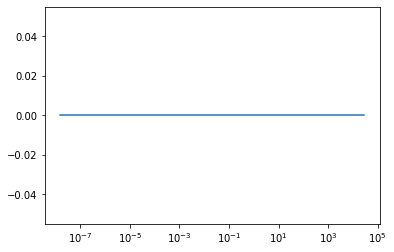

In [8]:
mf = m.provider.get_result('MF')
k, z, pk = m.provider.get_Pk_grid(nonlinear=False)
pk_interp = m.provider.get_Pk_interpolator(nonlinear=False)
plt.plot(mf.k/h, mf.power - pk_interp.P(zarr[-1], mf.k))
# plt.plot(mf., pk_interp.P(z[-1], k))
# plt.plot(k*h, pk[-1,:])

# plt.plot(k, [cosmo.pk(kk, 0) for kk in k] )
plt.xscale('log')
# plt.yscale('log')

In [17]:
import hmf
from importlib import reload
hmf = reload(hmf)
mf = hmf.MassFunction(z=0)
mf2 = hmf.MassFunction(z=0, custom_pk=np.zeros_like(mf.power))

Calculating power
Not using custom power


In [13]:
mf2.power

Calculating power
USING CUSTOM POWER


array([1.56459938e+02, 1.56459938e+02, 1.56459938e+02, 1.56459938e+02,
       1.56459938e+02, 1.56459938e+02, 1.56459938e+02, 1.56459938e+02,
       1.56459938e+02, 1.56459938e+02, 1.56459938e+02, 1.56459938e+02,
       1.56459938e+02, 1.56459938e+02, 1.56459938e+02, 1.56459938e+02,
       1.56459938e+02, 1.56459938e+02, 1.56459938e+02, 1.56459938e+02,
       1.56459938e+02, 1.56459938e+02, 1.56459938e+02, 1.56459938e+02,
       1.56459938e+02, 1.56459938e+02, 1.56459938e+02, 1.56459938e+02,
       1.56459938e+02, 1.56459938e+02, 1.56459938e+02, 1.56459938e+02,
       1.56459938e+02, 1.56459938e+02, 1.56459938e+02, 1.56459938e+02,
       1.56459938e+02, 1.56459938e+02, 1.56459938e+02, 1.56459938e+02,
       1.56459938e+02, 1.56459938e+02, 1.56459938e+02, 1.56459938e+02,
       1.56459938e+02, 1.56459938e+02, 1.56459938e+02, 1.56459938e+02,
       1.56459938e+02, 1.56459938e+02, 1.56459938e+02, 1.56459938e+02,
       1.56459938e+02, 1.56459938e+02, 1.56459938e+02, 1.56459938e+02,
      

In [29]:
mf.radii

array([ 0.30356287,  0.30590177,  0.30825869,  0.31063376,  0.31302714,
        0.31543895,  0.31786935,  0.32031847,  0.32278647,  0.32527348,
        0.32777965,  0.33030513,  0.33285007,  0.33541462,  0.33799893,
        0.34060315,  0.34322743,  0.34587193,  0.34853681,  0.35122222,
        0.35392833,  0.35665528,  0.35940324,  0.36217238,  0.36496285,
        0.36777482,  0.37060845,  0.37346392,  0.37634139,  0.37924103,
        0.38216302,  0.38510751,  0.38807469,  0.39106474,  0.39407782,
        0.39711411,  0.4001738 ,  0.40325707,  0.40636409,  0.40949505,
        0.41265013,  0.41582952,  0.41903341,  0.42226199,  0.42551544,
        0.42879396,  0.43209773,  0.43542697,  0.43878185,  0.44216258,
        0.44556936,  0.44900239,  0.45246187,  0.45594801,  0.459461  ,
        0.46300106,  0.4665684 ,  0.47016322,  0.47378574,  0.47743617,
        0.48111473,  0.48482163,  0.48855709,  0.49232133,  0.49611458,
        0.49993705,  0.50378897,  0.50767057,  0.51158208,  0.51

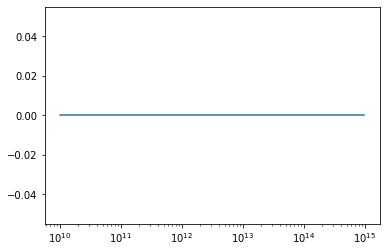

In [28]:
plt.plot(mf.m, mf._dlnsdlnm - mf2._dlnsdlnm)
# plt.plot(mf.k, mf.power - mf2.power)
plt.xscale('log')
# plt.yscale('log')